# Programming Project #1: Hybrid Images

## CS445: Computational Photography - Fall 2019

### Part I: Hybrid Images

In [1]:
import cv2

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy import signal
import scipy

import utils


In [2]:
%matplotlib notebook

In [63]:
im1_file = './tarik.jpg'
im2_file = './amar.jpg'

im1 = cv2.imread(im1_file, cv2.IMREAD_GRAYSCALE)
im2 = cv2.imread(im2_file, cv2.IMREAD_GRAYSCALE)

<IPython.core.display.Javascript object>


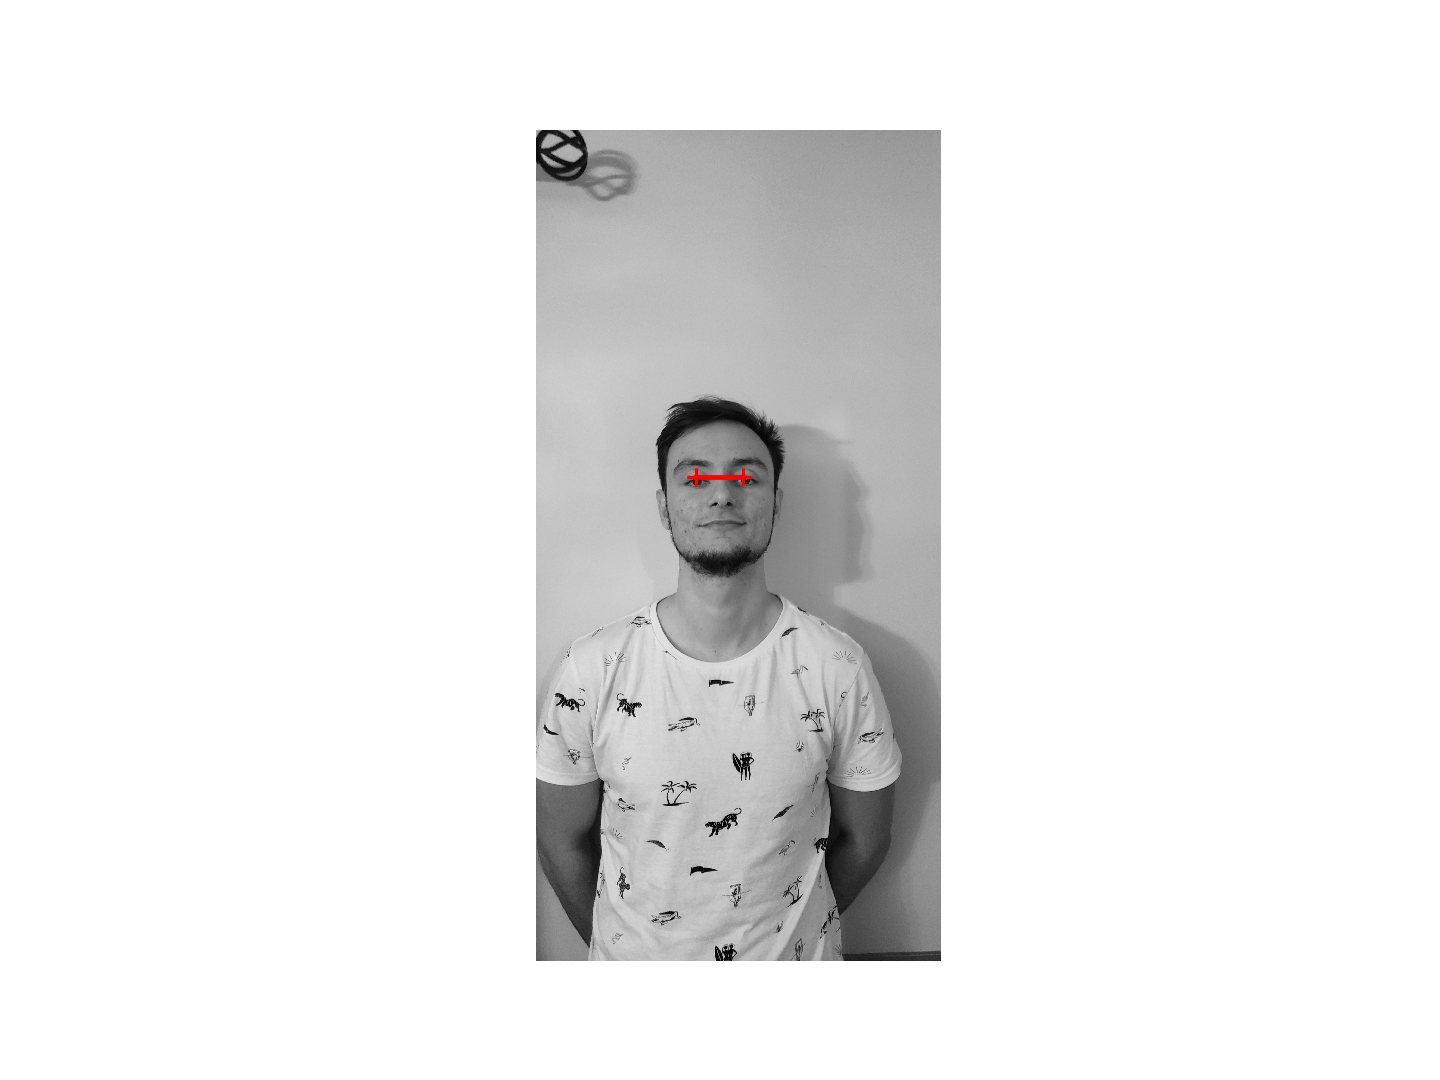

In [64]:
pts_im1 = utils.prompt_eye_selection(im1)

<IPython.core.display.Javascript object>


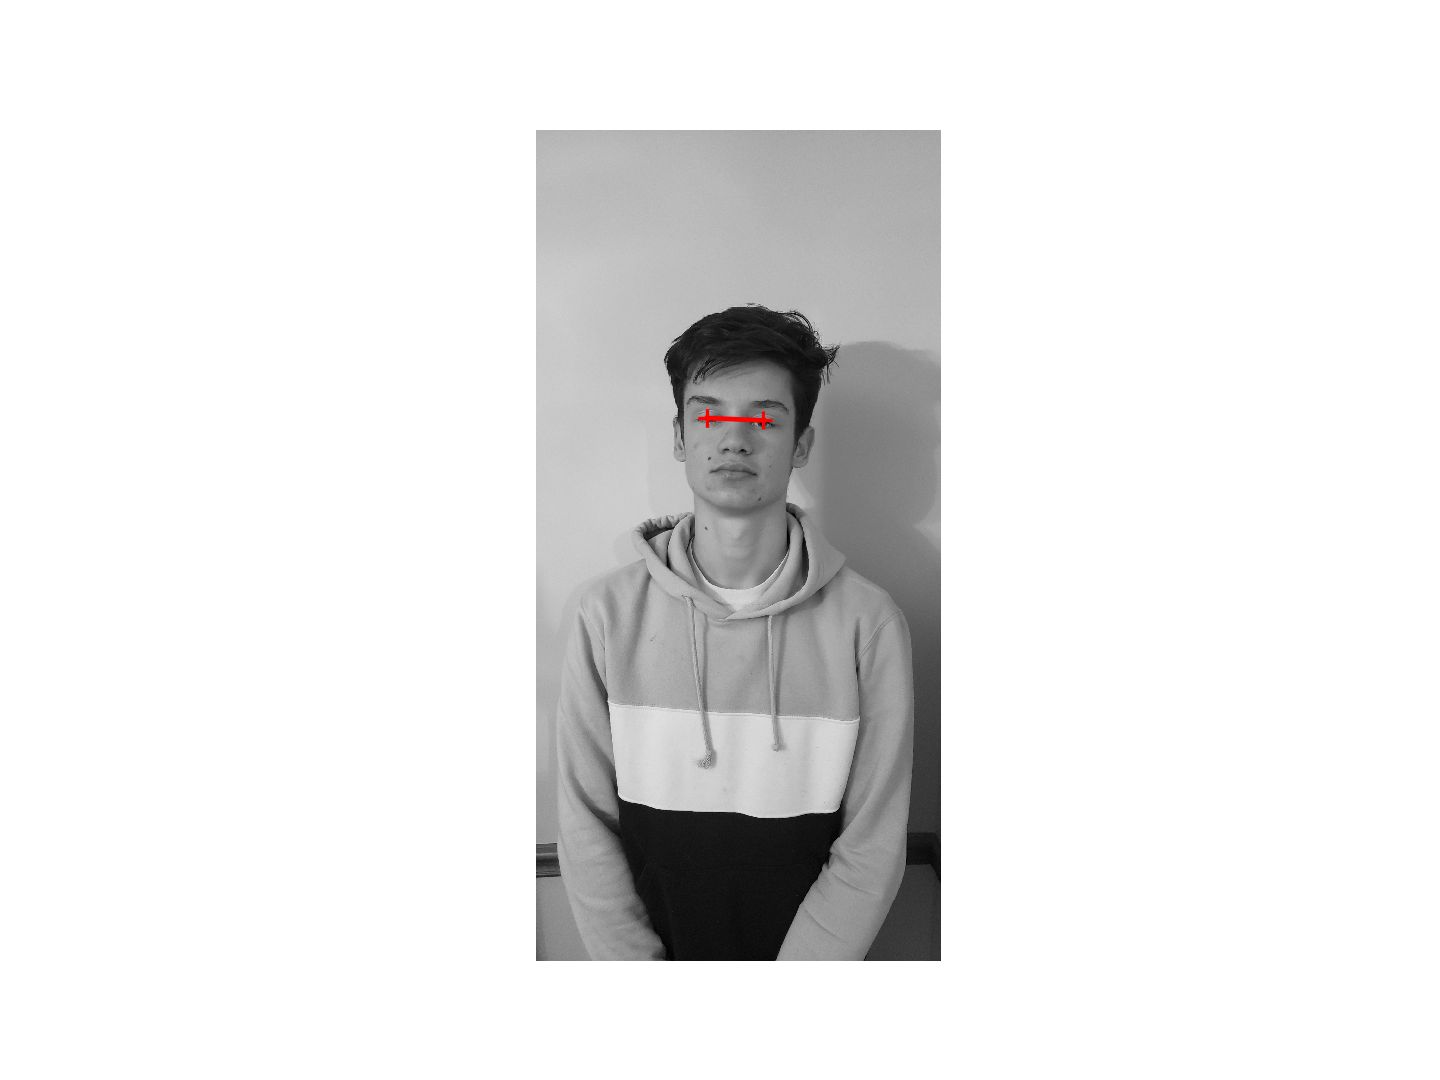

In [65]:
pts_im2 = utils.prompt_eye_selection(im2)

In [66]:
im1, im2 = utils.align_images(im1_file, im2_file,pts_im1,pts_im2,save_images=False)

In [67]:
# convert to grayscale
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY) / 255.0
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY) / 255.0

<IPython.core.display.Javascript object>


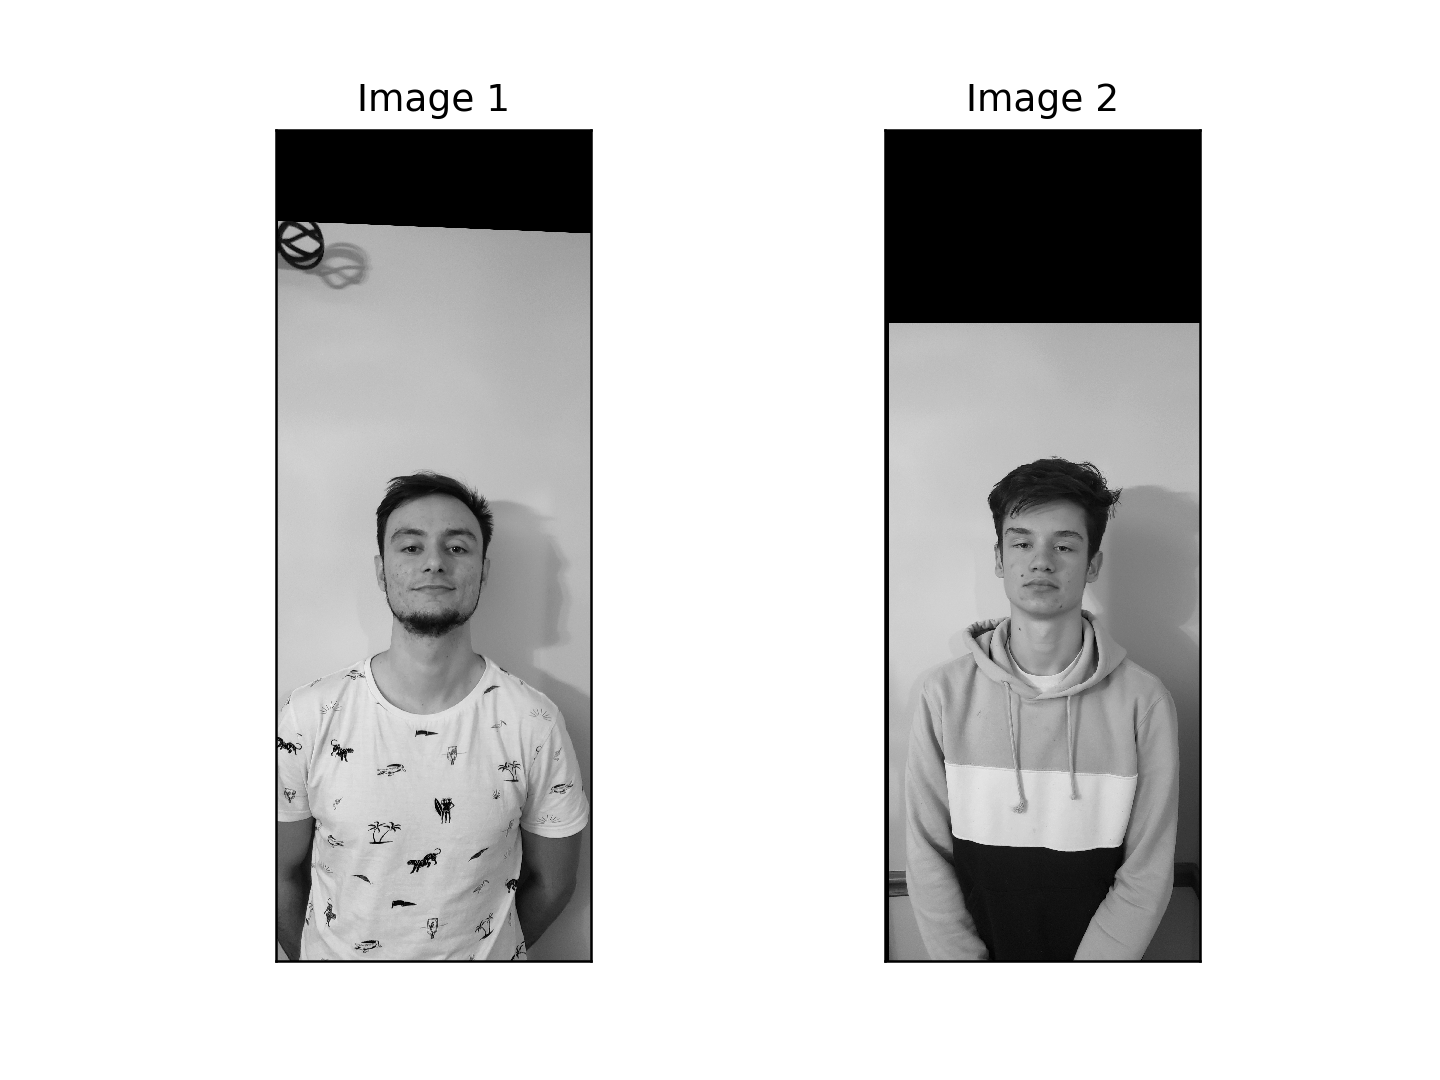

In [68]:
#Images sanity check
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im1,cmap='gray')
axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im2,cmap='gray')
axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([]);

In [83]:
from PIL import Image
cutoff_low = 7
cutoff_high = 14
fil_low = utils.gaussian_kernel(cutoff_low, round(cutoff_low * 3))
im_fil_1 = cv2.filter2D(im2,-1,fil_low)

fil_high = utils.gaussian_kernel(cutoff_high, cutoff_high * 3)
im_fil_2 = cv2.filter2D(im1,-1,fil_high)


lp = cv2.Laplacian(im2,cv2.CV_64F, ksize=5)
lp_1 = im2 - im_fil_1

hybrid = lp_1 + im_fil_2

#fig, axes = plt.subplots(1,1)
#axes[0].imshow(lp_1, cmap='gray')
#axes[1].imshow(im_fil_2, cmap='gray')
#axes.imshow(hybrid, cmap='gray')


rescaled = (255.0 / hybrid.max() * (hybrid - hybrid.min())).astype(np.uint8)

im = Image.fromarray(rescaled)
im.save('tarik_amar.png')





In [36]:
def hybridImage(im1, im2, cutoff_low, cutoff_high):
    '''
    Inputs:
        im1:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        im2:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        cutoff_low: standard deviation for the low-pass filter
        cutoff_high: standard deviation for the high-pass filter
        
    Output:
        Return the combination of both images, one filtered with a low-pass filter
        and the other with a high-pass filter.
    ''' 
    
    fil_low = utils.gaussian_kernel(cutoff_low, cutoff_low * 3)
    fil_high = utils.gaussian_kernel(cutoff_high, cutoff_high * 3)
    
    print(np.shape(fil_high))
    laplace_ones = np.ones(shape = np.shape(fil_high))
    print(np.shape(laplace_ones))
   
    im_fil_1 = cv2.filter2D(im1,-1,fil_low)
    
    laplace_filter = laplace_ones - fil_high
    

    im_fil_2 = cv2.filter2D(im2,-1, laplace_filter)

    
    #images = []
    #images.append(im_fil_1)
    #images.append(im_fil_2)
    #images.append(im_fil_1+im_fil_2)
    #images.append(fil_low)
    #images.append(fil_high)
    
    return im_fil_2
    


In [19]:
arbitrary_value = 2  # you should choose meaningful values; you might want to set to a fraction of image size
cutoff_low = 3
cutoff_high = 3

im_hybrid = hybridImage(im1, im2, cutoff_low, cutoff_high)

(19, 19)
(19, 19)


<IPython.core.display.Javascript object>


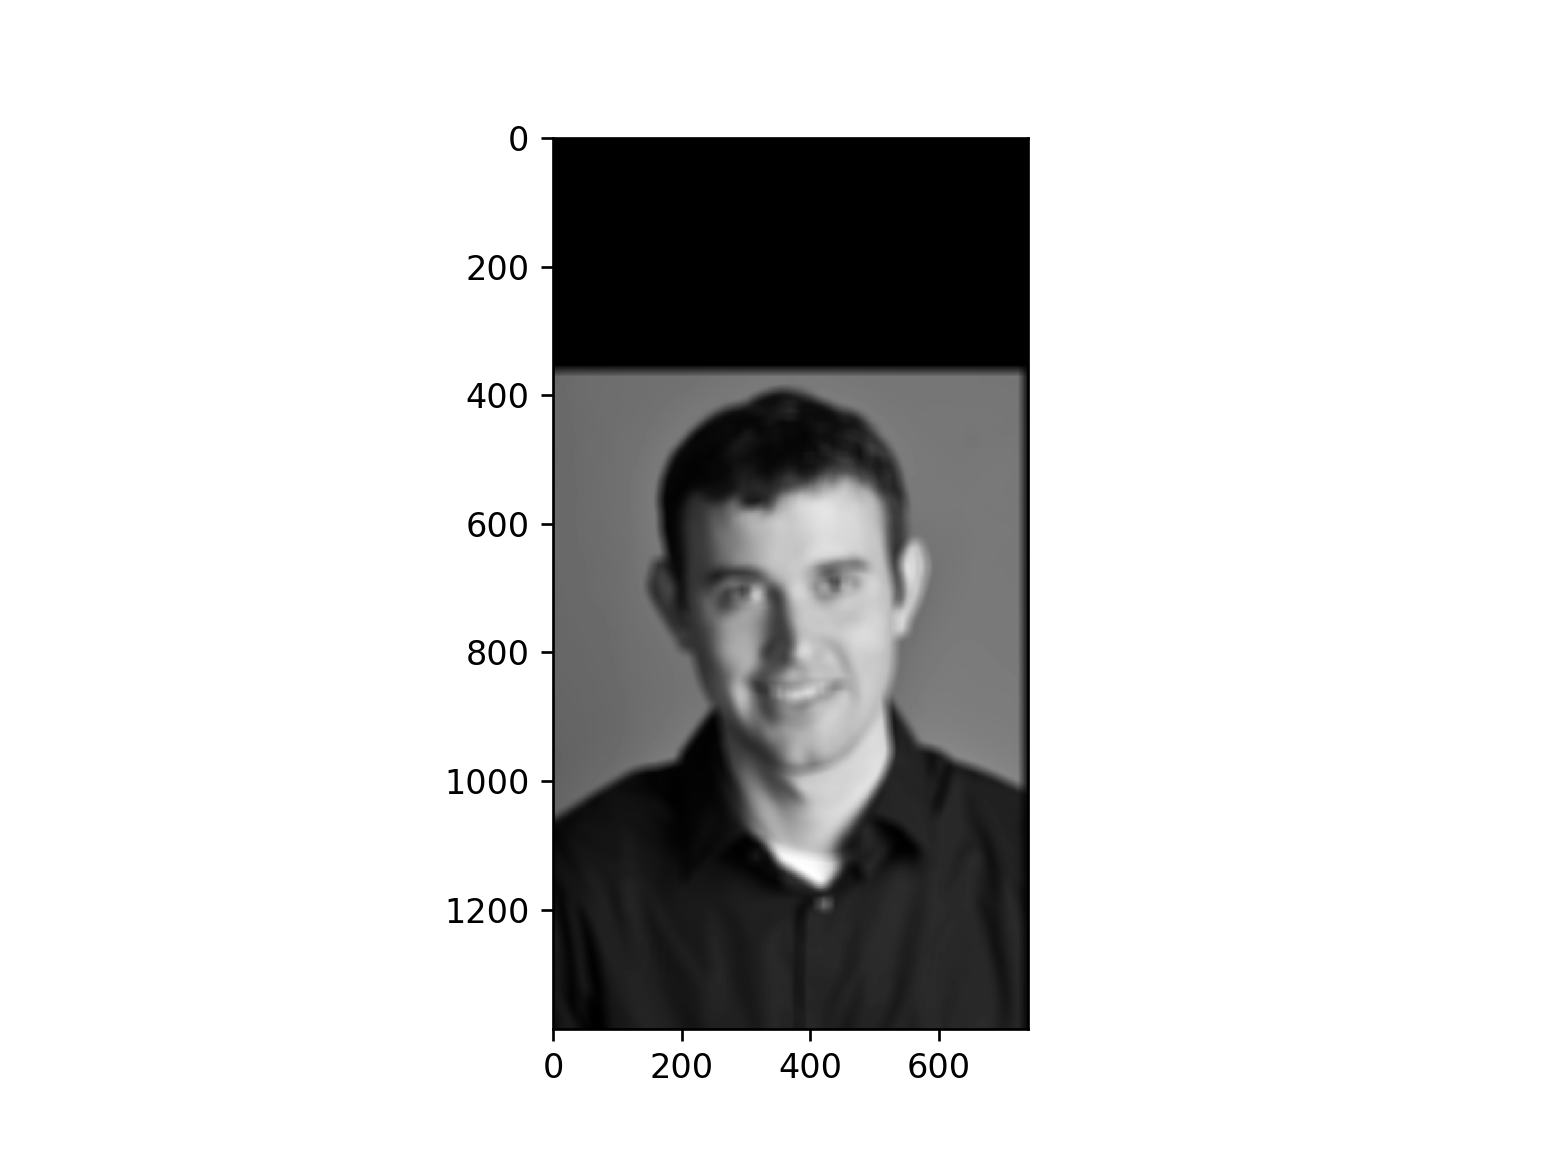

In [17]:

fig, axes = plt.subplots(1,1)
#axes[0].imshow(im_hybrid[0], cmap='gray')
#axes[1].imshow(im_hybrid[1], cmap='gray')
#axes[2].imshow(im_hybrid[2], cmap='gray')
#plt.axis("off")
#axes[0].imshow(im_hybrid, cmap='gray')
#axes[1].imshow(image_1, cmap='gray')
#axes[2].imshow(image_2, cmap='gray')
axes.imshow(im_hybrid, cmap='gray')



### Part II: Image Enhancement

In [ ]:
# Optional: Select top left corner and bottom right corner to crop image
# the function returns dictionary of 
# {
#   'cropped_image': np.ndarray of shape H x W
#   'crop_bound': np.ndarray of shape 2x2
# }
cropped_object = utils.interactive_crop(im_hybrid[2])

##### Two out of three types of image enhancement are required.  Choose a good image to showcase each type and implement a method.  This code doesn't rely on the hybrid image part.

#### Contrast enhancement

#### Color enhancement 

#### Color shift

In [ ]:
np.real(-np.Inf+1)